## Exemplo de uso do Simple Imputer

Este notebook tem como objetivo apresentar o uso do classe SimpleImputer para Imputação de Mediana. Vou utilizar como exemplo o Dataset do Titanic. 

### Importação das Bibliotecas

In [116]:
# trabalhar com dataframes
import pandas as pd
# trabalhar com arrays
import numpy as np
# gráficos
import matplotlib.pyplot as plt
# técnica de imputação
from sklearn.impute import SimpleImputer
# Divisão em Conjunto de Teste e Treinamento
from sklearn.model_selection import train_test_split

### Importação do Dataset

In [117]:
data = pd.read_csv('/home/vivas/Pesquisa/Datasets/Titanic/train.csv')
print(data.shape)
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
# verficar valores faltantes 
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

###  Verificar Tipos

In [119]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [120]:
# Nestes exemplo vamos trabalhar somente com valores numéricos então vamos eliminar as 
# outras variáveis que possuem missing data
print("Dataset Original",data.shape)
data = data[data['Cabin'].notna()]
data = data[data['Embarked'].notna()]

print("Após Eliminação NAs de Cabin e Embarked",data.shape)

Dataset Original (891, 12)
Após Eliminação NAs de Cabin e Embarked (202, 12)


In [121]:
# verficar valores faltantes 
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.094059
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.000000
dtype: float64

## Dividir o dataset
Aplicamos sempre a imputação no conjunto de treinamento  

In [122]:
features=data.columns
print(features)
# remover a feature Survived pois ela é o target
features.drop('Survived')
print(features)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [123]:
X_train, X_test, y_train, y_test = train_test_split(data[["Age"]], # just the features
                                                    data['Survived'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((141, 1), (61, 1))

In [124]:
type(X_train)

pandas.core.frame.DataFrame

In [125]:
# Vamos definir as estratégias 

# criando uma instância
imputerMediana = SimpleImputer(strategy='median')
imputer.fit(X_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [126]:
# Podemos olhar o valor imputado imputada
imputer.statistics_

array([35.])

In [127]:
# se quiser você verificar o valor calculado
X_train.median()

Age    35.0
dtype: float64

In [128]:
# Agora vamos imputar nos conjuntos de treinamento e teste

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[ 4. ],
       [46. ],
       [21. ],
       [31. ],
       [28. ],
       [37. ],
       [38. ],
       [40. ],
       [27. ],
       [61. ],
       [33. ],
       [ 4. ],
       [35. ],
       [48. ],
       [24. ],
       [55. ],
       [25. ],
       [24. ],
       [80. ],
       [52. ],
       [37. ],
       [42. ],
       [47. ],
       [58. ],
       [35. ],
       [54. ],
       [ 2. ],
       [40. ],
       [56. ],
       [38. ],
       [65. ],
       [31. ],
       [45.5],
       [16. ],
       [43. ],
       [51. ],
       [39. ],
       [50. ],
       [16. ],
       [42. ],
       [33. ],
       [52. ],
       [38. ],
       [14. ],
       [54. ],
       [64. ],
       [17. ],
       [35. ],
       [31. ],
       [40. ],
       [30. ],
       [62. ],
       [25. ],
       [29. ],
       [48. ],
       [54. ],
       [35. ],
       [49. ],
       [47. ],
       [23. ],
       [ 2. ],
       [23. ],
       [58. ],
       [65. ],
       [41. ],
       [ 4. ],
       [34

In [129]:
# SimpleImputer retorna um array e precisamos então transformar para Dataframe

X_train=pd.DataFrame(X_train)
X_train.columns = ["Age"]
X_train.head()
X_train.shape

(141, 1)

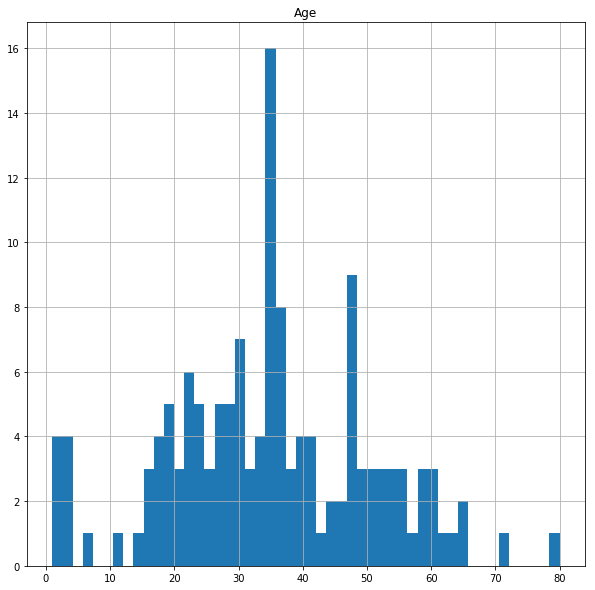

In [130]:
# Histograma da Distribuição dos dados
# Vamos verificar a influência da Imputação na variável média
X_train = pd.DataFrame(X_train)
X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [131]:
data["Age"].mean()

35.6744262295082

In [132]:
X_train["Age"].mean()

34.95744680851064

### Verificação dos valores do Dataset

In [135]:
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.094059
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.000000
dtype: float64

### Imputação do valor obtido

In [136]:
 data["Age"].fillna(35, inplace=True)

In [137]:
data.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64